# Ejecución de estrategia de manera simple con la última actualización de manera local sin testnet.

<function matplotlib.pyplot.show(close=None, block=None)>

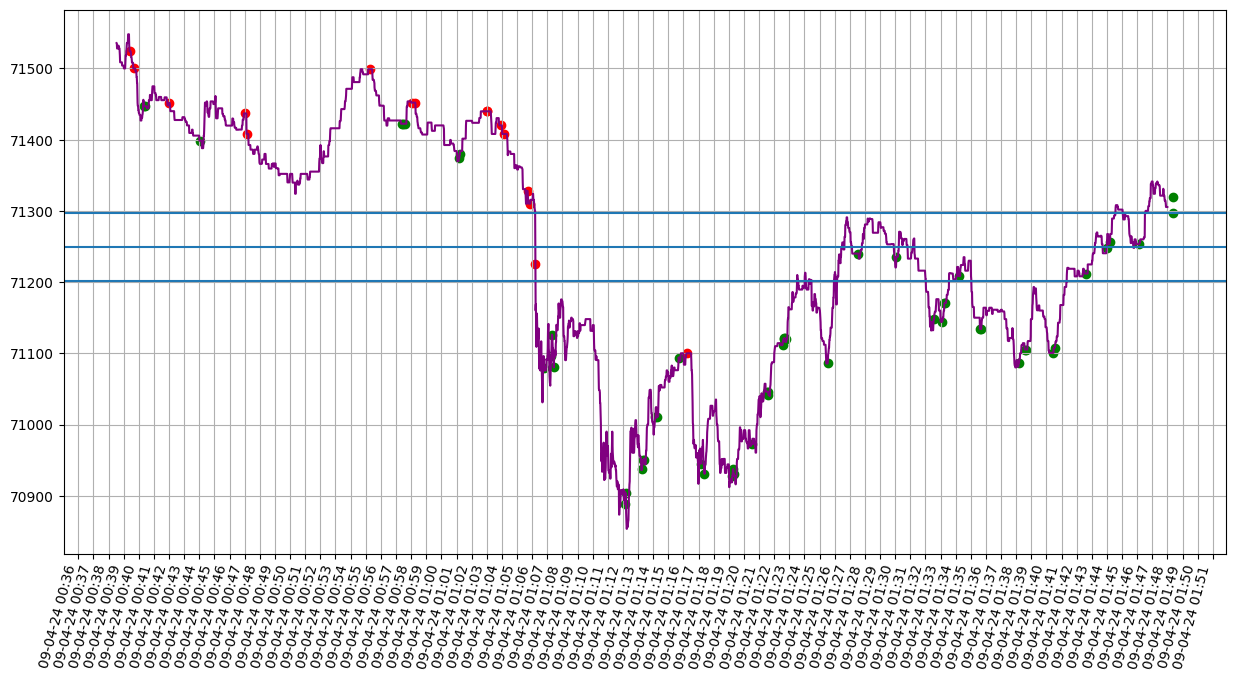

In [64]:
# ################################################################################################################################################################################
# # Importamos las librerías necesarias y generamos conexión con Binance para descargar la lista de pares que binance maneja.
# ################################################################################################################################################################################
# import pandas as pd
# import os
# import numpy as np
# from datetime import datetime
# import sympy as sp
# import scipy as sc
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from binance import Client

# client = Client()

# ##################################################
# # Lista de parámetros.
# ##################################################
# # Parámetros de interpolación.
# ###################################
# smooth_interval = 60
# smooth_exp = 3
# ###################################
# # Parámetros de estrategia.
# ###################################
# rango = 30
# std_mult = 750
# z_aprox = 0.009


# ##################################################################################################################################
# # Descarga y limpieza de datos de 5 días en adelante
# ##################################################################################################################################
# recent_data = pd.read_csv('../csvs/streaming/BTCUSDT.csv')
# recent_data.columns = ['Tiempo','Par','Precio']
# recent_data['Tiempo'] = recent_data.Tiempo.astype('datetime64')
# recent_data = recent_data.set_index('Tiempo')
# recent_data['Precio'] = recent_data.Precio.astype('Float32')
# recent_data = recent_data.reset_index()

# ##################################################
# # Interpolación (suavizado)  del Precio (OPEN) con SciPy y obtención de derivadas con su respectiva interpolación.
# ##################################################
# recent_data['Interpolacion'] = sc.signal.savgol_filter(recent_data.Precio,smooth_interval,smooth_exp)
# recent_data['Primer_Derivada'] = recent_data.Interpolacion.diff()/(recent_data.Tiempo.diff()/np.timedelta64(1, 's'))
# recent_data['PD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Primer_Derivada,smooth_interval,smooth_exp)
# recent_data['Segunda_Derivada'] = recent_data.PD_Interpolacion.diff()/(recent_data.Tiempo.diff()/np.timedelta64(1, 's'))
# recent_data['SD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Segunda_Derivada,smooth_interval,smooth_exp)
# recent_data['Tercer_Derivada'] = recent_data.SD_Interpolacion.diff()/(recent_data.Tiempo.diff()/np.timedelta64(1, 's'))
# recent_data['TD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Tercer_Derivada,smooth_interval,3)

# ######################################################################
# # Agregamos el código necesario para encontrar los puntos exactos mínimos y máximos
# ######################################################################
# initial_date_index = recent_data[recent_data.Tiempo == datetime.strptime(str(recent_data.Tiempo[-70*60:-60*70 + 1].item()),'%Y-%m-%d %H:%M:%S.%f')].index.item() + rango
# final_date_index = recent_data[recent_data.Tiempo == datetime.strptime(str(recent_data.Tiempo[-1:].item()),'%Y-%m-%d %H:%M:%S.%f')].index.item() - rango

# # initial_date_index = recent_data[recent_data.Tiempo == datetime.strptime(str(recent_data.Tiempo[60*30:60*30 + 1].item()),'%Y-%m-%d %H:%M:%S.%f')].index.item() + rango
# # final_date_index = recent_data[recent_data.Tiempo == datetime.strptime(str(recent_data.Tiempo[60*80:60*80 + 1].item()),'%Y-%m-%d %H:%M:%S.%f')].index.item() - rango

# lista_min_max = recent_data[initial_date_index:final_date_index][(recent_data[initial_date_index:final_date_index]['TD_Interpolacion'] >= -z_aprox) & (recent_data[initial_date_index:final_date_index]['TD_Interpolacion'] <= z_aprox)]
# indices_min_max = lista_min_max.index.tolist()

# max_points_idx = []
# min_points_idx = []
# pmin = 0
# pmax = 0

# for PMSD in indices_min_max:
#     if recent_data.SD_Interpolacion[PMSD:PMSD+1].item() > 0:
#         if (abs(recent_data.SD_Interpolacion[PMSD]*1000) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)) & ((recent_data.PD_Interpolacion[PMSD]*100) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)):
#             pmax = recent_data.SD_Interpolacion[PMSD]
#             pmax_idx = PMSD
#         for i in range(rango+1):
#             # if (i > PMSD) or (PMSD+i >= indices_min_max[-1:][0]):
#             #     break
#             if ((recent_data.SD_Interpolacion[PMSD-i] > pmax)) & ((abs(recent_data.SD_Interpolacion[PMSD-i]*1000)) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)) & ((recent_data.PD_Interpolacion[PMSD-i]*100) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)):
#                 pmax_idx = PMSD-i
#             elif ((recent_data.SD_Interpolacion[PMSD+i] > pmax)) & ((abs(recent_data.SD_Interpolacion[PMSD+i]*1000)) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)) & ((recent_data.PD_Interpolacion[PMSD+i]*100) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)):
#                 pmax_idx = PMSD+i
#         try:
#             max_points_idx.append(pmax_idx)
#         except:
#             pass
#     elif recent_data.SD_Interpolacion[PMSD:PMSD+1].item() < 0:
#         if (abs(recent_data.SD_Interpolacion[PMSD]*1000) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)) & ((recent_data.PD_Interpolacion[PMSD]*10) < -abs(np.std(recent_data.SD_Interpolacion)*std_mult)):
#             pmin = recent_data.SD_Interpolacion[PMSD]
#             pmin_idx = PMSD
#         for i in range(rango+1):
#             # if (i > PMSD) or (PMSD+i >= indices_min_max[-1:][0]):
#             #     break
#             if ((recent_data.SD_Interpolacion[PMSD-i] < pmin)) & (abs(recent_data.SD_Interpolacion[PMSD-i]*1000) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)) & ((recent_data.PD_Interpolacion[PMSD-i]*100) < -abs(np.std(recent_data.SD_Interpolacion)*std_mult)):
#                 pmin_idx = PMSD-i
#             elif ((recent_data.SD_Interpolacion[PMSD+i] < pmin)) & (abs(recent_data.SD_Interpolacion[PMSD+i]*1000) > abs(np.std(recent_data.SD_Interpolacion)*std_mult)) & ((recent_data.PD_Interpolacion[PMSD+i]*100) < -abs(np.std(recent_data.SD_Interpolacion)*std_mult)):
#                 pmin_idx = PMSD+i
#         try:
#             min_points_idx.append(pmin_idx)
#         except:
#             pass
# max_points_idx = list(set(max_points_idx))
# min_points_idx = list(set(min_points_idx))
# max_points_idx.sort()
# min_points_idx.sort()
# close_points_max = []
# close_points_min = []
# for lista in [max_points_idx,min_points_idx]:
#     for i in range(len(lista)-1):
#         if lista[i+1]-lista[i] == 1:
#             if lista == max_points_idx:
#                 close_points_max.append(i+1)
#             else:
#                 close_points_min.append(i+1)
#     if lista == max_points_idx:
#         for idx in sorted(close_points_max,reverse=True):
#             del lista[idx]
#     else:
#         for idx in sorted(close_points_min,reverse=True):
#             del lista[idx]


##################################################################################################################################
# Gráfica final del backtesting sobre nuestro análisis con puntos de compra y venta.
##################################################################################################################################
mp = recent_data.Precio[initial_date_index:final_date_index].mean()
plt.figure(figsize=(15,8))
plt.plot(recent_data.Tiempo[initial_date_index:final_date_index],recent_data.Precio[initial_date_index:final_date_index].multiply(1),color='purple')
# plt.plot(recent_data.Tiempo[initial_date_index-rango:final_date_index],recent_data.Interpolacion[initial_date_index-rango:final_date_index].multiply(1),color='red')
# plt.plot(recent_data.Tiempo[initial_date_index-rango:final_date_index],recent_data.PD_Interpolacion[initial_date_index-rango:final_date_index].multiply(100)+mp)
# plt.plot(recent_data.Tiempo[initial_date_index-rango:final_date_index],recent_data.SD_Interpolacion[initial_date_index-rango:final_date_index].multiply(1000)+mp,color='k')
plt.scatter(recent_data.Tiempo.iloc[max_points_idx],recent_data.Precio.iloc[max_points_idx],color='g')
plt.scatter(recent_data.Tiempo.iloc[min_points_idx],recent_data.Precio.iloc[min_points_idx],color='r')
plt.grid(visible=True)

# Set minor tick locations.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
# plt.gca().xaxis.set_minor_locator(minorLocator)
plt.gcf().autofmt_xdate()
# Set grid to use minor tick locations. 
plt.grid(which = 'minor')
plt.xticks(rotation=75)
plt.axhline(mp)
plt.axhline(np.std(recent_data.dropna().SD_Interpolacion)*std_mult + mp)
plt.axhline(mp - np.std(recent_data.dropna().SD_Interpolacion)*std_mult)
plt.show

In [60]:
pmax_df = recent_data.iloc[max_points_idx].loc[:,['Tiempo','Precio']]
pmax_df['Accion'] = 'C'
pmin_df = recent_data.iloc[min_points_idx].loc[:,['Tiempo','Precio']]
pmin_df['Accion'] = 'V'
vc_df = pd.concat([pmax_df,pmin_df],axis=1)
vc_df = vc_df.reset_index()
vc_df = vc_df.set_index('index')
vc_df = pd.concat([pmax_df,pmin_df],axis=0)
vc_df = vc_df.sort_index()
del_idx = []
vc_df = vc_df.reset_index()
for i in vc_df.index:
    try:
        if vc_df.Accion[i+1] == vc_df.Accion[i]:
            del_idx.append(i+1)
    except:
        pass
vc_df.drop(del_idx,inplace=True)
vc_df = vc_df.reset_index(drop=True)
vc_df['Diferencia_Precio_USDT'] = pd.Series(dtype='float')
for i in range(len(vc_df)-1):
    vc_df['Diferencia_Precio_USDT'][i+1] = (vc_df.Precio[i+1] - vc_df.Precio[i])
profits = 0
for i in range(len(vc_df)-1):
    if vc_df.Accion[i] == 'C' and vc_df.Diferencia_Precio_USDT[i+1] > 0:
        profits += vc_df.Diferencia_Precio_USDT[i+1]
    elif vc_df.Accion[i] == 'C' and vc_df.Diferencia_Precio_USDT[i+1] < 0:
        profits -= vc_df.Diferencia_Precio_USDT[i+1]
    elif vc_df.Accion[i] == 'V' and vc_df.Diferencia_Precio_USDT[i+1] > 0:
        profits += vc_df.Diferencia_Precio_USDT[i+1]
    elif vc_df.Accion[i] == 'V' and vc_df.Diferencia_Precio_USDT[i+1] < 0:
        profits -= vc_df.Diferencia_Precio_USDT[i+1]
profits

C:\Users\tinma\AppData\Local\Temp\ipykernel_31344\2403581129.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vc_df['Diferencia_Precio_USDT'][i+1] = (vc_df.Precio[i+1] - vc_df.Precio[i]) * .001


0.8954765625000001